<a href="https://colab.research.google.com/github/shinobu9/econometrica/blob/main/sem_2_15_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

from scipy import signal

import statsmodels.tsa as tsa
import statsmodels.stats as stat
import statsmodels.api as sm

!pip install pandas_market_calendars
import pandas_market_calendars as mcal
from datetime import datetime
import matplotlib.dates as mdates

from matplotlib import pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 KB 14.1 MB/s eta 0:00:00


## Задача 4а Проверка ряда на независимость и одинаковую распределенность с использованием критериев согласия

Вспомним 4 задачу:


In [ ]:
wn = []

for i in range(0, 4):
    wn.append(np.random.standard_normal(200))

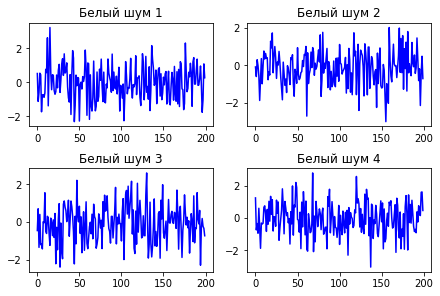

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, constrained_layout=True)

i=0

for row in ax:
    for col in row:
        col.set(title='Белый шум '+str(i+1))
        col.plot(wn[i], 'b-')
        i += 1 

plt.show()

Проверьте гипотезы о том, что полученные в задаче 4 ряды являются случайными выборками из нормального распределения, используя критерии согласия (Lilliefors, Anderson-Darling). 

In [ ]:
# Liliefors statistic and p-value
stat.diagnostic.lilliefors(wn[0], dist='norm')

(0.045055695552146724, 0.4269853962451619)

In [ ]:
results = list(map(stat.diagnostic.lilliefors, wn))
results

[(0.045055695552146724, 0.4269853962451619),
 (0.03876600594320162, 0.6642332858085711),
 (0.0446076575915183, 0.44191183514617677),
 (0.04230249578410139, 0.5225052024915444)]

In [ ]:
# Anderson-Darling statistic
stats.anderson(wn[0], 'norm')

AndersonResult(statistic=0.2843559173650192, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
results = list(map(lambda x: stats.anderson(x, 'norm').statistic, wn))
results

[0.2843559173650192,
 0.24662623431026987,
 0.408383832594609,
 0.3486625627675153]

Согласуются ли результаты применения критериев согласия с результатами диагностики, проведенной в задаче 4?

Проверьте гипотезы о том, что полученные в задаче 4 ряды являются случайными выборками из стандартного нормального распределения, используя критерии согласия.

In [ ]:
# Kolmogorov-Smirnov statistic
stats.kstest(wn[0], 'norm')

KstestResult(statistic=0.042001288452784835, pvalue=0.8572459779377372)

In [ ]:
# Kolmogorov-Smirnov statistic
stats.kstest(wn[0], 'norm', args = (0, 1))

KstestResult(statistic=0.042001288452784835, pvalue=0.8572459779377372)

In [ ]:
results = list(map(lambda x: stats.kstest(x, 'norm'), wn))
results

[KstestResult(statistic=0.042001288452784835, pvalue=0.8572459779377372),
 KstestResult(statistic=0.08704538554826136, pvalue=0.09093802505240955),
 KstestResult(statistic=0.0707611663723694, pvalue=0.25691269366779357),
 KstestResult(statistic=0.03960574199645367, pvalue=0.8998096585714913)]

## Задача 5а Проверка гипотезы нормальности

Проверьте гипотезу о том, что логарифмические доходности ряда DJ (1984) на втором периоде образуют случайную выборку из нормального распределения, используя критерии согласия (Lilliefors, Anderson-Darling, Jarque-Bera) 

In [ ]:
data = pd.read_stata('dj_1984_daily.dta')

In [ ]:
trad_dat = mcal.get_calendar('NYSE').schedule(start_date = '1984-02-28', end_date = '1984-12-31')
dates = mcal.date_range(trad_dat, frequency='1D')
data['date'] = dates

In [ ]:
range_2 = (data['date'] > '1984-08-06')
ts_2 = data[range_2]

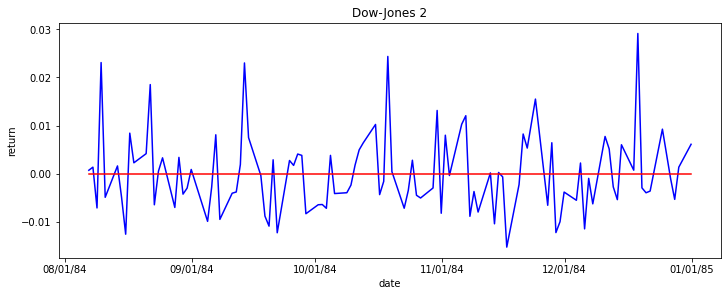

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Dow-Jones 2')
ax.plot(ts_2['date'], ts_2['dj_ret'],'b-')
ax.plot(ts_2['date'], np.zeros(len(ts_2['date'])),'r-')
ax.xaxis_date()
ax.set_xlabel('date')
ax.set_ylabel('return')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))

plt.show()

In [ ]:
print('Liliefors', stat.diagnostic.lilliefors(ts_2['dj_ret']))

print(stats.kstest(ts_2['dj_ret'], 'norm', args = (np.mean(ts_2['dj_ret']), np.std(ts_2['dj_ret']))))

print(stats.kstest(ts_2['dj_ret'], 'norm'))

print('Anderson-Darling', 
      'statistic =', stats.anderson(ts_2['dj_ret'], 'norm').statistic,
      'critical value = ', stats.anderson(ts_2['dj_ret'], 'norm').critical_values[2] )

print(stats.jarque_bera(ts_2['dj_ret']))

Liliefors (0.08881201816279027, 0.04779755515709398)
KstestResult(statistic=0.08943539328711303, pvalue=0.3607905980528659)
KstestResult(statistic=0.49392791629300964, pvalue=1.0127454594270726e-23)
Anderson-Darling statistic = 1.4531706925505858 critical value =  0.759
Jarque_beraResult(statistic=30.105778964358855, pvalue=2.901437108349114e-07)


А что они покажут, если применить их к самому индексу?

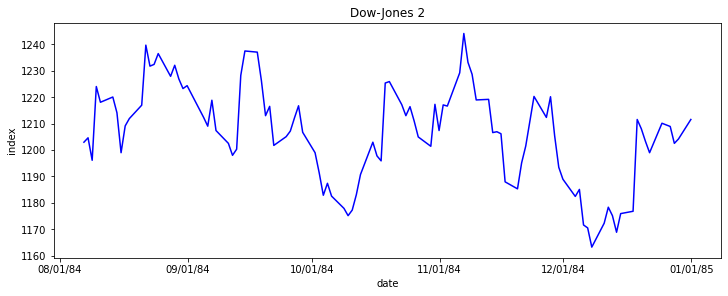

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Dow-Jones 2')
ax.plot(ts_2['date'], ts_2['dj'],'b-')
ax.xaxis_date()
ax.set_xlabel('date')
ax.set_ylabel('index')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))

plt.show()

In [ ]:
print('Liliefors', stat.diagnostic.lilliefors(ts_2['dj']))

print(stats.kstest(ts_2['dj'], 'norm', args = (np.mean(ts_2['dj']), np.std(ts_2['dj']))))

print('Anderson-Darling', 
      'statistic =', stats.anderson(ts_2['dj'], 'norm').statistic,
      'critical value = ', stats.anderson(ts_2['dj'], 'norm').critical_values[2] )

print(stats.jarque_bera(ts_2['dj']))

Liliefors (0.07355735602472774, 0.2023004652990342)
KstestResult(statistic=0.07305123341002467, pvalue=0.6151883737513391)
Anderson-Darling statistic = 0.6442405750489826 critical value =  0.759
Jarque_beraResult(statistic=2.5906525169441927, pvalue=0.2738085174086061)


Вернемся к доходности

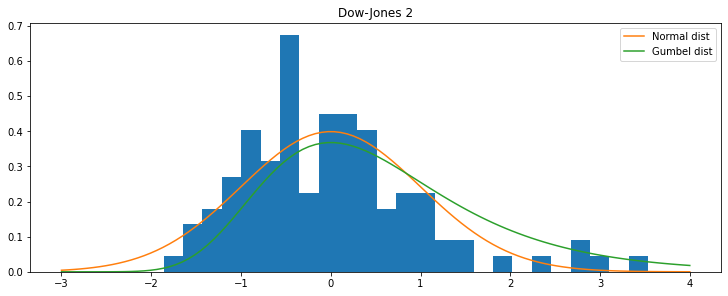

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Dow-Jones 2')

ts_norm = (ts_2['dj_ret'] - np.mean(ts_2['dj_ret'])) / np.std(ts_2['dj_ret'])
ax.hist(ts_norm, bins = 25, density = True)

x = np.linspace(-3, 4, 100)
ax.plot(x, stats.norm.pdf(x), label = 'Normal dist')

ax.plot(x, stats.gumbel_r.pdf(x), label = 'Gumbel dist')

plt.legend()
plt.show()

In [ ]:
#print(stats.kstest(ts_norm, 'norm'))
#print(stats.kstest(ts_norm, 'gumbel_r'))

print('Anderson-Darling',
      'statistic =', stats.anderson(ts_2['dj_ret'], 'gumbel_r').statistic,
      'critical value = ', stats.anderson(ts_2['dj_ret'], 'gumbel_r').critical_values[2])

Anderson-Darling statistic = 0.18807812113730904 critical value =  0.742


## Задача 5b

Рассмотрим еще раз первый период.

Там гипотеза случайности была отвергнута критерием Кендалла, который обнаружил фактическое наличие понижательного тренда на этом периоде.

In [ ]:
range_1 = (data['date'] > '1984-02-27') & (data['date'] <= '1984-06-07')
ts_1 = data[range_1]

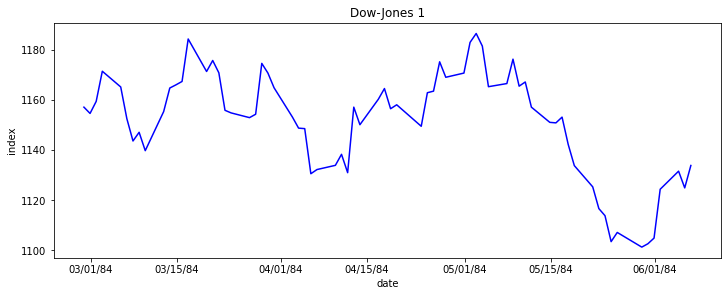

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Dow-Jones 1')
ax.plot(ts_1['date'], ts_1['dj'],'b-')
ax.xaxis_date()
ax.set_xlabel('date')
ax.set_ylabel('index')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%D"))

plt.show()

Оценим на этом периоде регрессию ряда DJ на линейный тренд и на DJ(-1) и проведем диагностику остатков.

https://www.statsmodels.org/dev/tsa.html

In [ ]:
ar_1 = sm.tsa.AutoReg(ts_1['dj'], lags = 1, trend = 'ct')
results = ar_1.fit()
print(results.summary())

# DJ(t) = const + beta * t + a_1 * DJ_(t-1) + eps_t (mu, sigma)


                            AutoReg Model Results                             
Dep. Variable:                     dj   No. Observations:                   70
Model:                     AutoReg(1)   Log Likelihood                -248.604
Method:               Conditional MLE   S.D. of innovations              8.882
Date:                Wed, 15 Feb 2023   AIC                              4.484
Time:                        11:31:09   BIC                              4.613
Sample:                             1   HQIC                             4.535
                                   70                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    148.9505     67.879      2.194      0.028      15.910     281.991
trend         -0.0788      0.061     -1.291      0.197      -0.198       0.041
dj.L1          0.8728      0.058     15.049      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


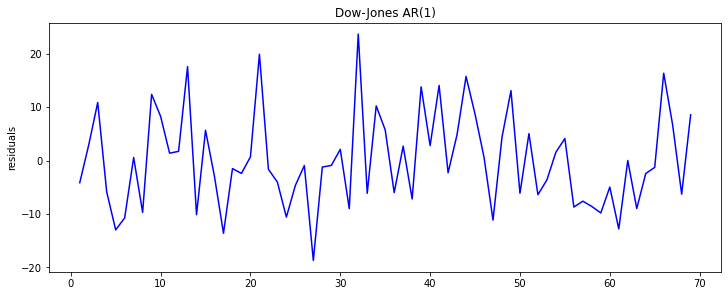

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)

ax.set(title='Dow-Jones AR(1)')
ax.plot(results.resid,'b-')
ax.set_ylabel('residuals')

plt.show()

In [ ]:
print('Liliefors', stat.diagnostic.lilliefors(results.resid))

print('Anderson-Darling', 
      'statistic =', stats.anderson(results.resid, 'norm').statistic,
      'critical value = ', stats.anderson(results.resid, 'norm').critical_values[2] )

print(stats.jarque_bera(results.resid))

Liliefors (0.07755939301652359, 0.44971221694736263)
Anderson-Darling statistic = 0.5492767210202203 critical value =  0.748
Jarque_beraResult(statistic=2.992247348399351, pvalue=0.2239967638791187)


In [ ]:
sm.graphics.tsa.plot_acf(results.resid)
sm.graphics.tsa.plot_pacf(results.resid, method = 'ywm')
plt.show()

Пример использования разложения временных рядов

https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration/notebook

In [ ]:
train = pd.read_csv('train_eng.csv')
train.head()

,Unnamed: 0,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,...,3.0,1.0,6.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0
1,8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2898.0,2676.0,2032.0,2294.0,2074.0,2175.0,2156.0,2302.0,2098.0,1770.0
2,8359,"""European_Society_for_Clinical_Investigation""_...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,...,1401.0,1238.0,976.0,810.0,989.0,1332.0,1243.0,1681.0,1303.0,1098.0
4,8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,...,404.0,344.0,225.0,229.0,335.0,313.0,379.0,393.0,354.0,272.0


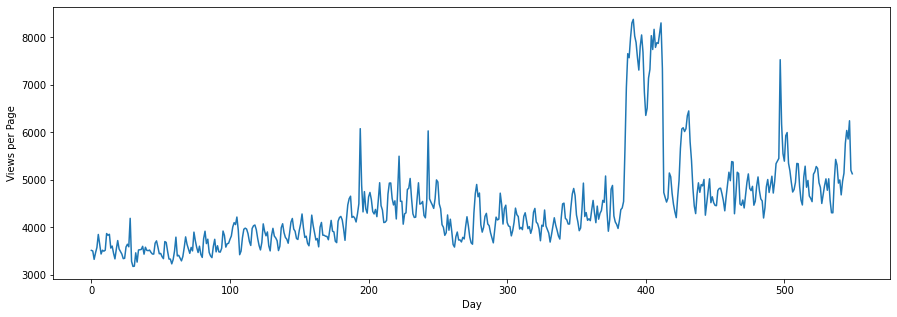

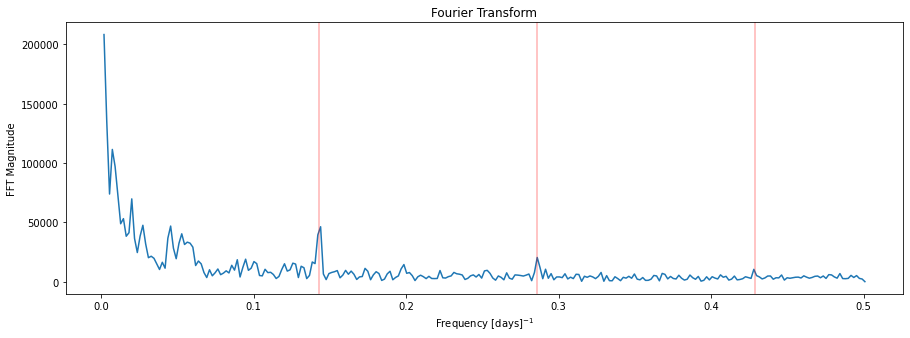

In [ ]:
from scipy.fftpack import fft
sums = train.iloc[:,2:].sum(axis=0) / train.shape[0]
days = [r for r in range(sums.shape[0])]

fig = plt.figure(1,figsize=[15,5])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.plot(days,sums)
    
fig = plt.figure(2,figsize=[15,5])
fft_complex = fft(sums.values)
fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
fft_xvals = [day / days[-1] for day in days]
npts = len(fft_xvals) // 2 + 1
fft_mag = fft_mag[:npts]
fft_xvals = fft_xvals[:npts]
        
plt.ylabel('FFT Magnitude')
plt.xlabel(r"Frequency [days]$^{-1}$")
plt.title('Fourier Transform')
plt.plot(fft_xvals[1:],fft_mag[1:] )
# Draw lines at 1, 1/2, and 1/3 week periods
plt.axvline(x=1./7,color='red',alpha=0.3)
plt.axvline(x=2./7,color='red',alpha=0.3)
plt.axvline(x=3./7,color='red',alpha=0.3)

plt.show()